In [1]:
import pandas as pd

df = pd.read_csv('processed_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 125.1 KB


In [3]:
df['Total_Activity_Hours'] = (
    df['Study_Hours_Per_Day'] +
    df['Extracurricular_Hours_Per_Day'] +
    df['Physical_Activity_Hours_Per_Day'] +
    df['Social_Hours_Per_Day']
)
df['Study_Sleep_Ratio'] = df['Study_Hours_Per_Day'] / df['Sleep_Hours_Per_Day']

df['Free_Time_Hours'] = 24 - (
    df['Study_Hours_Per_Day'] +
    df['Extracurricular_Hours_Per_Day'] +
    df['Physical_Activity_Hours_Per_Day'] +
    df['Social_Hours_Per_Day'] +
    df['Sleep_Hours_Per_Day']
)


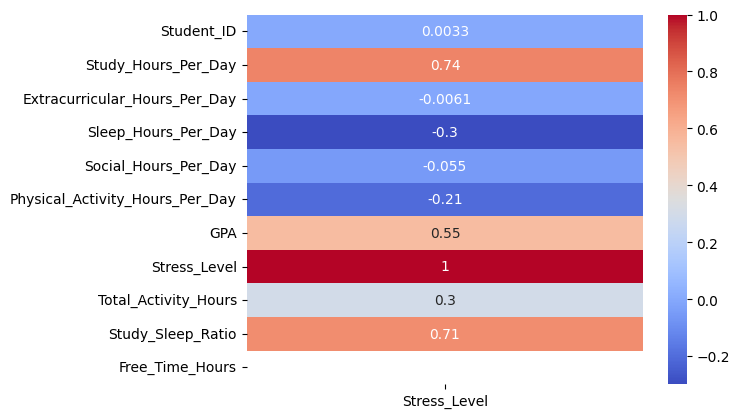

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
sns.heatmap(corr[['Stress_Level']], annot=True, cmap='coolwarm')
plt.show()

In [4]:
print(df['Stress_Level'].value_counts())
print(df['Stress_Level'].value_counts(normalize=True))  # percentage

Stress_Level
2    1029
1     674
0     297
Name: count, dtype: int64
Stress_Level
2    0.5145
1    0.3370
0    0.1485
Name: proportion, dtype: float64


In [7]:
df.to_csv("feature_engineering_dataset.csv", index=False)

In [ ]:
df = df.drop(['Student_ID', 'Free_Time_Hours'], axis=1)